In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import glob
import os.path
pd.set_option('display.max_columns', None)

In [2]:
dfs = []

for path in glob.glob("rteu/mof-rts-*_rteu_bearings.csv"):
    _, fname = os.path.split(path)
    station, ts, _ = fname.split("_")
    
    df = pd.read_csv(path, parse_dates=["date.time"])
    df["Station"] = station
    df["bearing_error"] = (((df["real_bearing"] - df["bearings_filtered_linear"] + 180) % 360) - 180).abs()
    dfs.append(df)

rteu = pd.concat(dfs)
rteu

Unnamed: 0    V1  type           date.time   latitude  longitude  \
0             1   109  True 2021-04-15 10:45:07  50.839118   8.672322   
1             2   126  True 2021-04-15 10:46:34  50.839476   8.671893   
2             3   850  True 2021-04-15 11:07:51  50.842122   8.676302   
3             4   929  True 2021-04-15 11:09:45  50.841908   8.678051   
4             5   932  True 2021-04-15 11:09:48  50.841903   8.678022   
..          ...   ...   ...                 ...        ...        ...   
837         838  1854  True 2021-04-15 11:15:07  50.841313   8.674403   
838         839  1858  True 2021-04-15 11:15:11  50.841329   8.674344   
839         840  1155  True 2021-04-15 11:02:57  50.841907   8.673466   
840         841  1223  True 2021-04-15 11:04:05  50.841460   8.674243   
841         842  1673  True 2021-04-15 11:12:00  50.841252   8.676293   

     accuracy.m.  altitude.m.  geoid_height.m.  speed.m.s.  bearing.deg.  \
0              3        393.1              NaN       2.133           337   
1              4        389.1              NaN       1.465           342   
2              5        345.3              NaN       0.646            48   
3              4        344.8              NaN       1.650           246   
4              4        344.7              NaN       0.629           251   
..           ...          ...              ...         ...           ...   
837            3        341.1              NaN       0.892           301   
838            3        341.3              NaN       0.921           323   
839            6        335.6              NaN       0.653           116   
840            6        341.7              NaN       0.866           161   
841            4        364.3              NaN       0.415           240   

     sat_used  sat_inview name desc             gps_time             time_gps  \
0          22          32  NaN  NaN  2021-04-15 10:45:07  2021-04-15 10:45:07   
1          22          31  NaN  NaN  2021-04-15 10:46:34  2021-04-15 10:46:34   
2          25          31  NaN  NaN  2021-04-15 11:07:51  2021-04-15 11:07:51   
3          25          31  NaN  NaN  2021-04-15 11:09:45  2021-04-15 11:09:45   
4          25          31  NaN  NaN  2021-04-15 11:09:48  2021-04-15 11:09:48   
..        ...         ...  ...  ...                  ...                  ...   
837        22          30  NaN  NaN  2021-04-15 11:15:07  2021-04-15 11:15:07   
838        22          30  NaN  NaN  2021-04-15 11:15:11  2021-04-15 11:15:11   
839        25          31  NaN  NaN  2021-04-15 11:02:57  2021-04-15 11:02:57   
840        25          31  NaN  NaN  2021-04-15 11:04:05  2021-04-15 11:04:05   
841        25          30  NaN  NaN  2021-04-15 11:12:00  2021-04-15 11:12:00   

               timestamp        station          0          1          2  \
0    2021-04-15 10:45:07  mof-rts-00011        NaN  23.173743  21.810361   
1    2021-04-15 10:46:34  mof-rts-00011        NaN  22.976224  22.263348   
2    2021-04-15 11:07:51  mof-rts-00011        NaN  23.998532  23.476106   
3    2021-04-15 11:09:45  mof-rts-00011        NaN  22.972371  22.453339   
4    2021-04-15 11:09:48  mof-rts-00011        NaN  23.242032  22.884507   
..                   ...            ...        ...        ...        ...   
837  2021-04-15 11:15:07  mof-rts-00003  27.714696        NaN        NaN   
838  2021-04-15 11:15:11  mof-rts-00003  25.787400        NaN        NaN   
839  2021-04-15 11:02:57  mof-rts-00003  25.105004  25.858007        NaN   
840  2021-04-15 11:04:05  mof-rts-00003  25.099297  26.637836        NaN   
841  2021-04-15 11:12:00  mof-rts-00003  33.096036  35.014080        NaN   

             3  lead  second_antenna  third_antenna     delta  antennas  \
0          NaN     1               2              0  0.064923         2   
1          NaN     1               2              0  0.033946         2   
2    22.379545     1               2              3  0.024877         3   
3          NaN     1         

In [12]:
dfs = []

for path in glob.glob("tRackIT/mof-rts-*_tRackIT_bearings.csv"):
    if "00004" in path:
        continue
    _, fname = os.path.split(path)
    station, ts, _ = fname.split("_")
    
    df = pd.read_csv(path, parse_dates=["date.time"])
    df["Station"] = station
    df["bearing_error"] = (((df["real_bearing"] - df["bearings_filtered_linear"] + 180) % 360) - 180).abs()
    dfs.append(df)

trackit = pd.concat(dfs)
trackit

Unnamed: 0    V1  type           date.time   latitude  longitude  \
0             1  1196  True 2021-04-14 14:03:56  50.837731   8.672029   
1             2  1197  True 2021-04-14 14:03:57  50.837731   8.672028   
2             3  1205  True 2021-04-14 14:04:05  50.837710   8.672015   
3             4  1206  True 2021-04-14 14:04:06  50.837707   8.672014   
4             5  1212  True 2021-04-14 14:04:12  50.837692   8.672013   
..          ...   ...   ...                 ...        ...        ...   
987         988  3162  True 2021-04-14 14:22:46  50.843242   8.672247   
988         989  3255  True 2021-04-14 14:25:20  50.843963   8.672827   
989         990  3302  True 2021-04-14 14:26:14  50.843426   8.673220   
990         991  3399  True 2021-04-14 14:27:59  50.842330   8.673311   
991         992  3673  True 2021-04-14 14:33:07  50.842171   8.676373   

     accuracy.m.  altitude.m.  geoid_height.m.  speed.m.s.  bearing.deg.  \
0              3        439.1              NaN       0.057           311   
1              3        439.3              NaN       0.002           311   
2              3        436.3              NaN       0.054           311   
3              3        435.7              NaN       0.049           311   
4              2        433.1              NaN       0.005           311   
..           ...          ...              ...         ...           ...   
987            4        328.2              NaN       1.697           329   
988            4        311.6              NaN       1.051           131   
989            4        320.9              NaN       1.213           164   
990            4        320.9              NaN       0.503           184   
991            3        345.6              NaN       0.060           110   

     sat_used  sat_inview  name  desc             gps_time  \
0          16          27   NaN   NaN  2021-04-14 14:03:56   
1          16          27   NaN   NaN  2021-04-14 14:03:57   
2          16          27   NaN   NaN  2021-04-14 14:04:05   
3          16          27   NaN   NaN  2021-04-14 14:04:06   
4          17          28   NaN   NaN  2021-04-14 14:04:12   
..        ...         ...   ...   ...                  ...   
987        18          30   NaN   NaN  2021-04-14 14:22:46   
988        17          28   NaN   NaN  2021-04-14 14:25:20   
989        17          28   NaN   NaN  2021-04-14 14:26:14   
990        17          27   NaN   NaN  2021-04-14 14:27:59   
991        17          27   NaN   NaN  2021-04-14 14:33:07   

                time_gps            timestamp     Frequency  Duration  \
0    2021-04-14 14:03:56  2021-04-14 14:03:56  1.501723e+08  0.017920   
1    2021-04-14 14:03:57  2021-04-14 14:03:57  1.501723e+08  0.019627   
2    2021-04-14 14:04:05  2021-04-14 14:04:05  1.501723e+08  0.017920   
3    2021-04-14 14:04:06  2021-04-14 14:04:06  1.501723e+08  0.017920   
4    2021-04-14 14:04:12  2021-04-14 14:04:12  1.501723e+08  0.017920   
..                   ...                  ...           ...       ...   
987  2021-04-14 14:22:46  2021-04-14 14:22:46  1.501723e+08  0.017920   
988  2021-04-14 14:25:20  2021-04-14 14:25:20  1.501723e+08  0.017920   
989  2021-04-14 14:26:13  2021-04-14 14:26:13  1.501723e+08  0.017920   
990  2021-04-14 14:27:59  2021-04-14 14:27:59  1.501723e+08  0.017067   
991  2021-04-14 14:33:07  2021-04-14 14:33:07  1.501723e+08  0.017067   

             0          1          2          3        station  lead  \
0   -46.229760 -58.932261 -58.249092 -58.230396  mof-rts-00015     0   
1   -46.591839 -59.805932 -58.421631 -58.295824  mof-rts-00015     0   
2   -46.284680 -58.758759 -59.047494 -57.954601  mof-rts-00015     0   
3   -46.464780 -58.767069 -59.923900 -57.758150  mof-rts-00015     0   
4   -46.900808 -59.006139 -58.510899 -58.322625  mof-rts-00015     0   
..         ...        ...        ...        ...            ...   ...   
987        NaN -82.902341 -87.412735 -75.942158  mof-rts-00011     3   
988        NaN -8

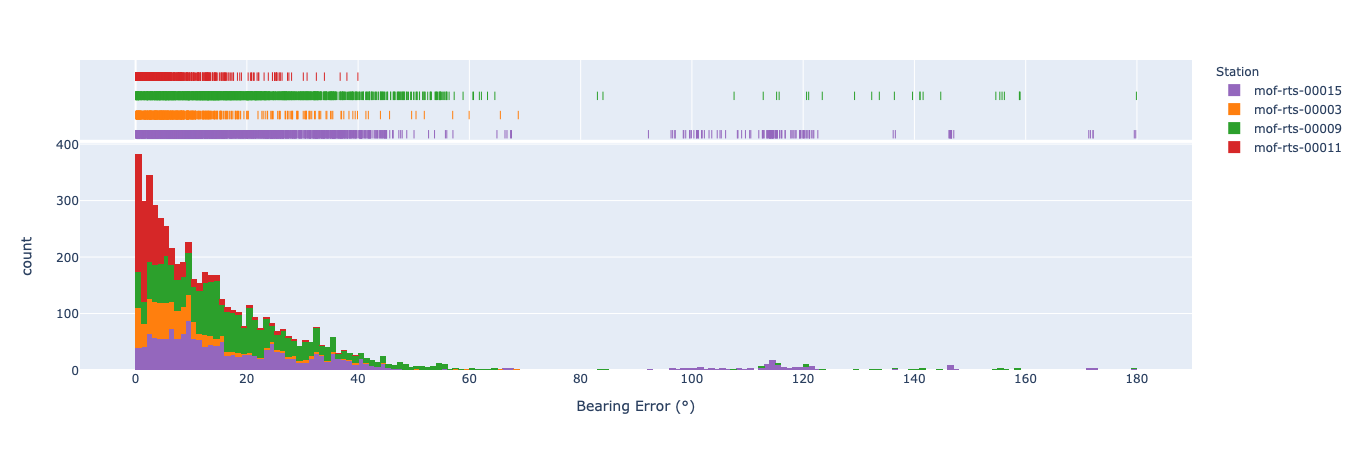

In [13]:
fig = px.histogram(
    trackit, 
    x="bearing_error", 
    color="Station", 
    marginal="rug", 
    labels={
        "bearing_error": "Bearing Error (°)",
    },
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    #range_y=(-5, 350)
)
for b in fig._data_objs:
    if b.__class__.__name__ == "Histogram":
        b.xbins=dict(start='0', end='180', size='1')
        b.autobinx=False

fig.write_image(
    "fig/tRackIT-bearing_error.pdf",
    width=500,
    height=500,)
fig.show()

In [14]:
trackit["bearing_error"].describe()

count    5546.000000
mean       16.533503
std        21.092749
min         0.000005
25%         4.268305
50%        10.741691
75%        21.536126
max       179.902843
Name: bearing_error, dtype: float64

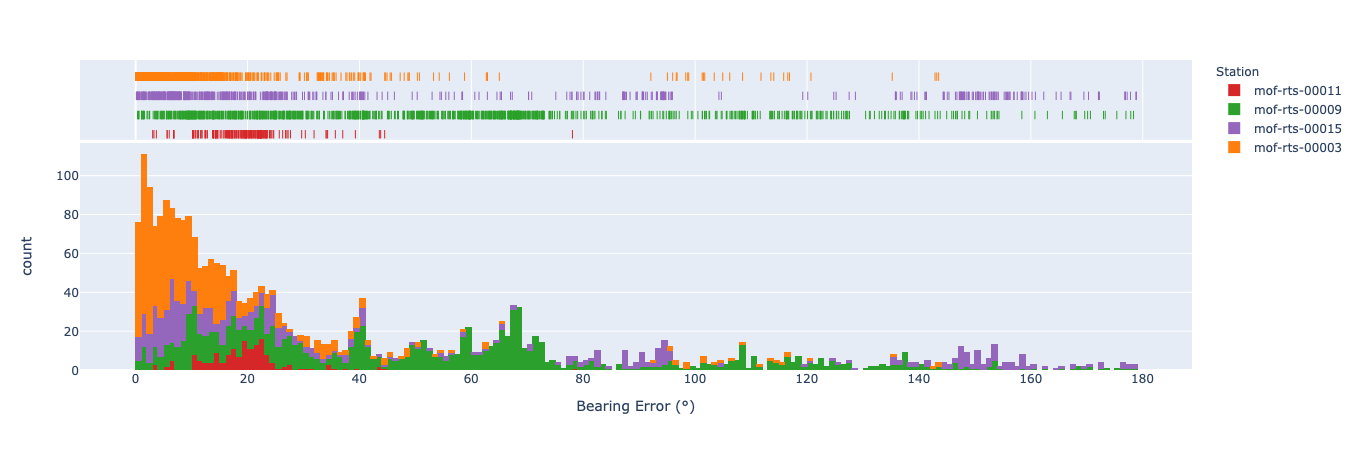

In [6]:
fig2 = px.histogram(
    rteu, 
    x="bearing_error", 
    color="Station", 
    marginal="rug", 
    labels={
        "bearing_error": "Bearing Error (°)",
    },
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    nbins=180,
)
for b in fig2._data_objs:
    if b.__class__.__name__ == "Histogram":
        b.xbins=dict(start='0', end='180', size='1')
        b.autobinx=False

fig2.write_image(
    "fig/rteu-bearing_error.pdf",
    width=500,
    height=500,
)
fig2.show()

In [7]:
rteu["bearing_error"].describe()

count    2728.000000
mean       38.900300
std        42.621402
min         0.000001
25%         7.997714
50%        20.433399
75%        59.830743
max       178.861583
Name: bearing_error, dtype: float64

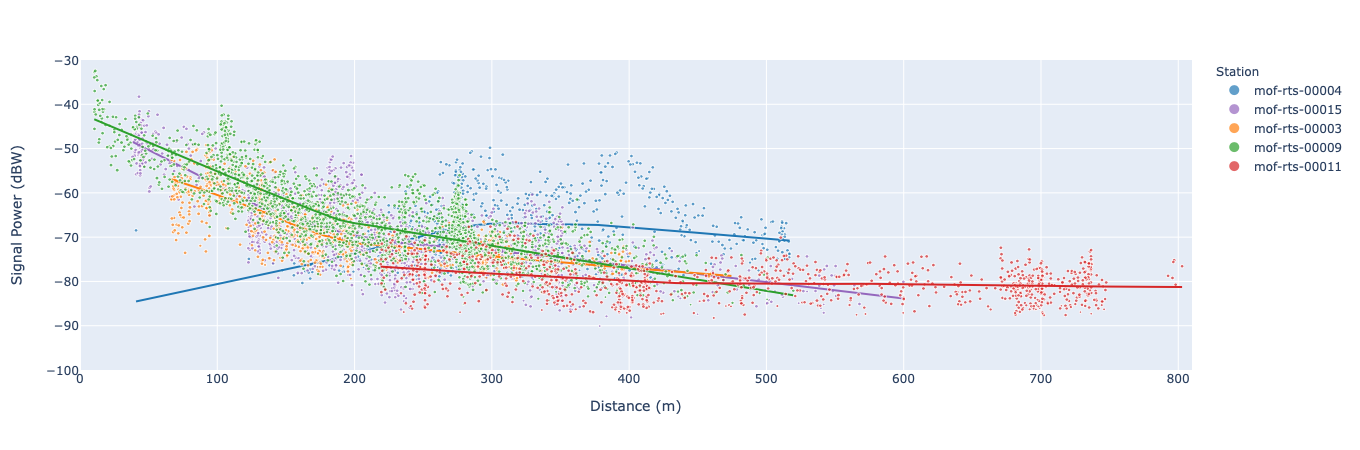

In [8]:
fig = px.scatter(
    trackit,
    x="distance",
    y="max_dB",
    labels={
        "max_dB": "Signal Power (dBW)",
        "distance": "Distance (m)",
    },
    color="Station",
    size_max=3.0,
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    size="Duration",
    render_mode="svg",
    trendline="lowess",
)
fig.update_xaxes(range=[0, 810])
fig.update_yaxes(range=[-100, -30])
fig.write_image(
    "fig/tRackIT-power_distance.pdf",
    width=500,
    height=500,
)
fig.show()

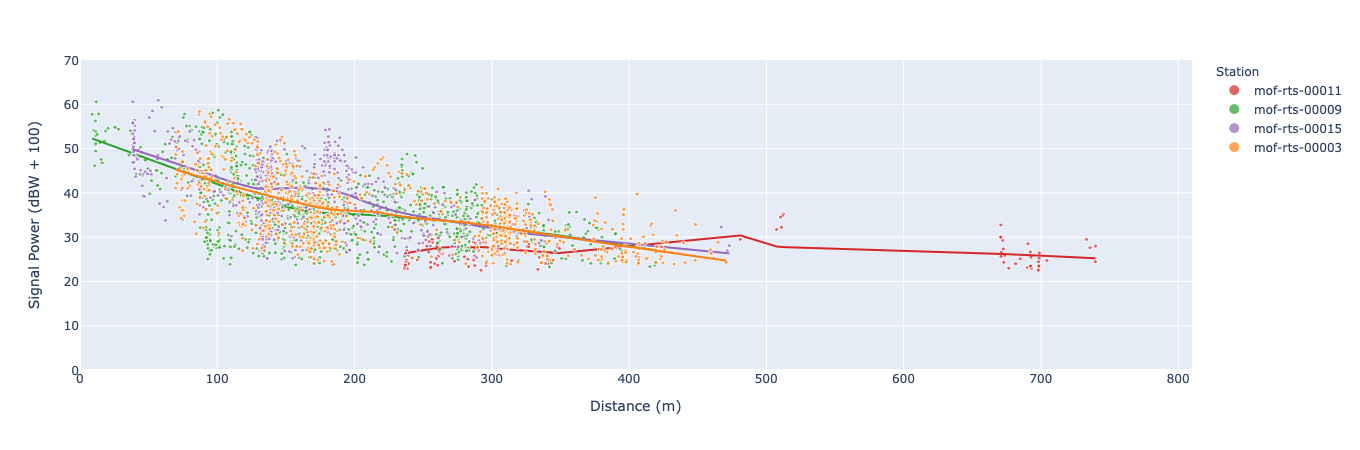

In [9]:
rteu["Duration"] = 0.02
fig = px.scatter(
    rteu,
    x="distance",
    y="max_dB",
    labels={
        "max_dB": "Signal Power (dBW + 100)",
        "distance": "Distance (m)",
    },
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    color="Station",
    size_max=3.0,
    size="Duration",
    render_mode="svg",
    trendline="lowess",
)
fig.update_xaxes(range=[0, 810])
fig.update_yaxes(range=[0, 70])
fig.write_image(
    "fig/rteu-power_distance.pdf",
    width=500,
    height=500,
)
fig.show()

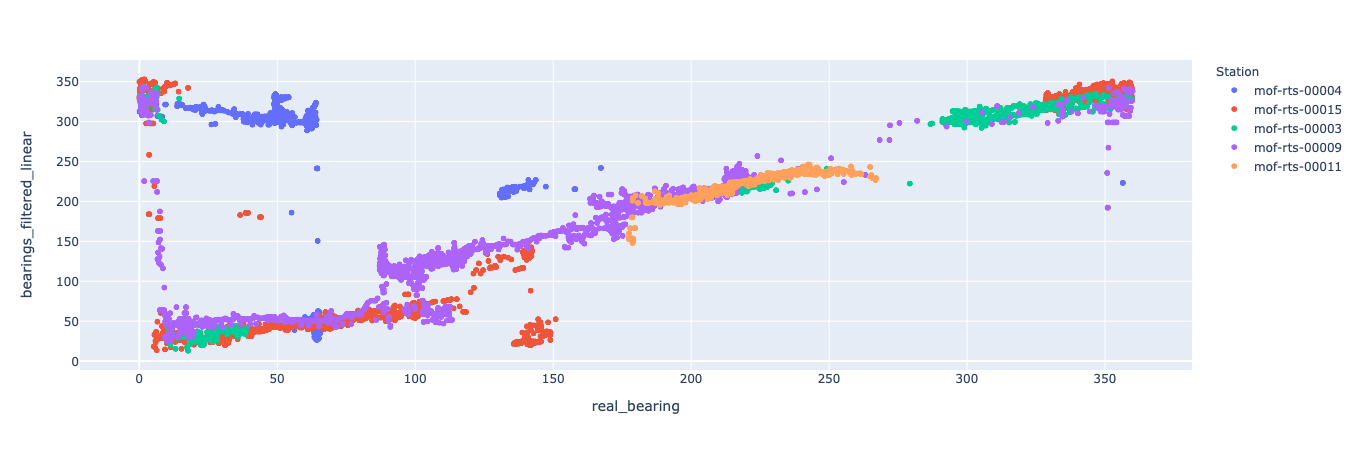

In [10]:
px.scatter(
    trackit,
    x="real_bearing",
    y="bearings_filtered_linear",
    color="Station",
)

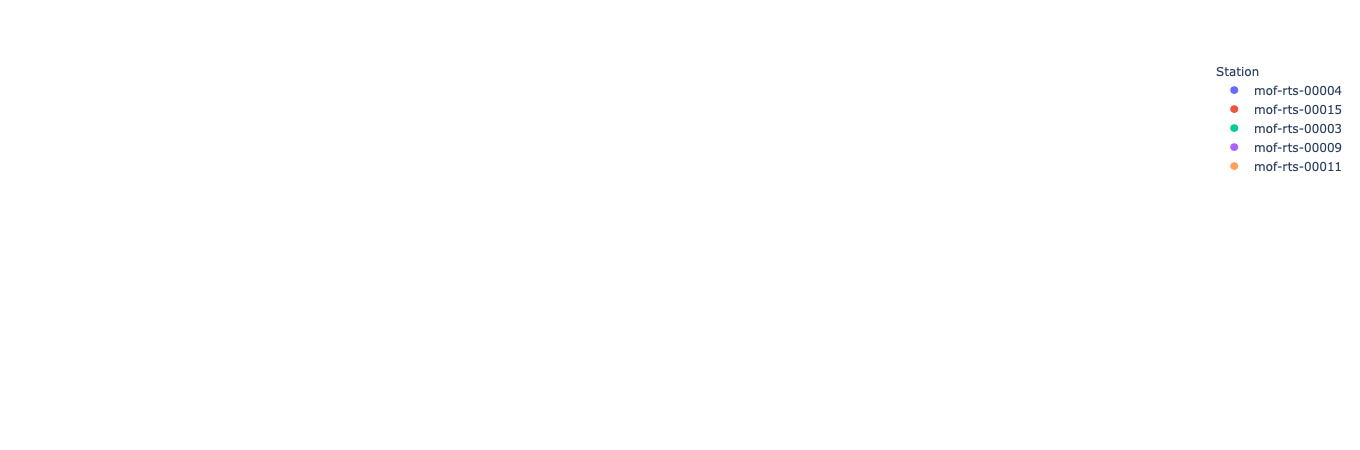

In [11]:
px.scatter_3d(
    trackit,
    y="real_bearing",
    x="distance",
    z="bearing_error",
    color="Station",
)